# KM3 -  Modelowanie

In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
#ignore warnings
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import OPTICS
from sklearn.mixture import GaussianMixture


#random seed
np.random.seed(4324)

C:\Users\Zosia\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
pd.set_option("display.max_columns", None)

### Wczytanie danych po feature engineeringu

In [3]:
#load different datasets
df1 = pd.read_csv('../Data/no_standarization.csv')
df2 = pd.read_csv('../Data/raw_normalized_scaled.csv')
df3 = pd.read_csv('../Data/log_normalized.csv')
df4 = pd.read_csv('../Data/log_scaled.csv')
df4_og = df4.copy()
df5 = pd.read_csv('../Data/removed_columns_no_standarization.csv')
df = pd.read_csv('../Data/our_data.csv')

In [4]:
df1.head()

runtime_minutes  director_name  movie_averageRating  movie_numerOfVotes  \
0            116.0          503.0                  6.3              5077.0   
1            114.0          299.0                  6.2             22262.0   
2            124.0           75.0                  7.1            145614.0   
3            125.0          350.0                  7.0            110757.0   
4             98.0          568.0                  6.1             41748.0   

   approval_Index  production_year     month_sin     month_cos  \
0        3.823171             1996  1.000000e-10  1.000000e-10   
1        4.434679             1993  8.660254e-01  5.000000e-01   
2        6.078636             2011  1.000000e-10  1.000000e+00   
3        5.850243             1977  1.000000e-10  1.000000e-10   
4        4.643223             2000  5.000000e-01  8.660254e-01   

   number_of_professions  age  Production budget $  Domestic gross $  \
0                      3    2           19000000.0         1353824.0   
1                      3    1           30000000.0        50081992.0   
2                      3    1           50000000.0        75624550.0   
3                      3    2           14000000.0        46800000.0   
4                      2    2            9500000.0        57176582.0   

   Worldwide gross $  Action  Adventure  Animation  Biography  Comedy  Crime  \
0          1353824.0       0          0          0          0       0      1   
1        140081992.0       0          0          0          0       0      0   
2        118729073.0       0          0          0          0       1      0   
3        185400000.0       1          1          0          0       0      0   
4         59675307.0       0          0          0          0       1      0   

   Documentary  Drama  Family  Fantasy  Film-Noir  History  Horror  Music  \
0            0      1       0        0          0        0       0      1   
1            0      1       0        0          0        0       0      0   
2            0      1       1        0          0        0       0      0   
3            0      0       0        0          0        0       0      0   
4            0      0       0        0          0        0       0      0   

   Musical  Mystery  News  Romance  Sci-Fi  Sport  Thriller  War  Western  \
0        0        0     0        0       0      0         0    0        0   
1        0        1     0        1       0      0         0    0        0   
2        0        0     0        0       0      0         0    0        0   
3        0        0     0        0       0      0         1    0        0   
4        0        0     0        0       0      0         0    0        0   

   cluster  
0        0  
1        3  
2        3  
3        3  
4        0

### Przypomnienie łokci z FE, aby określić liczbę klastrów

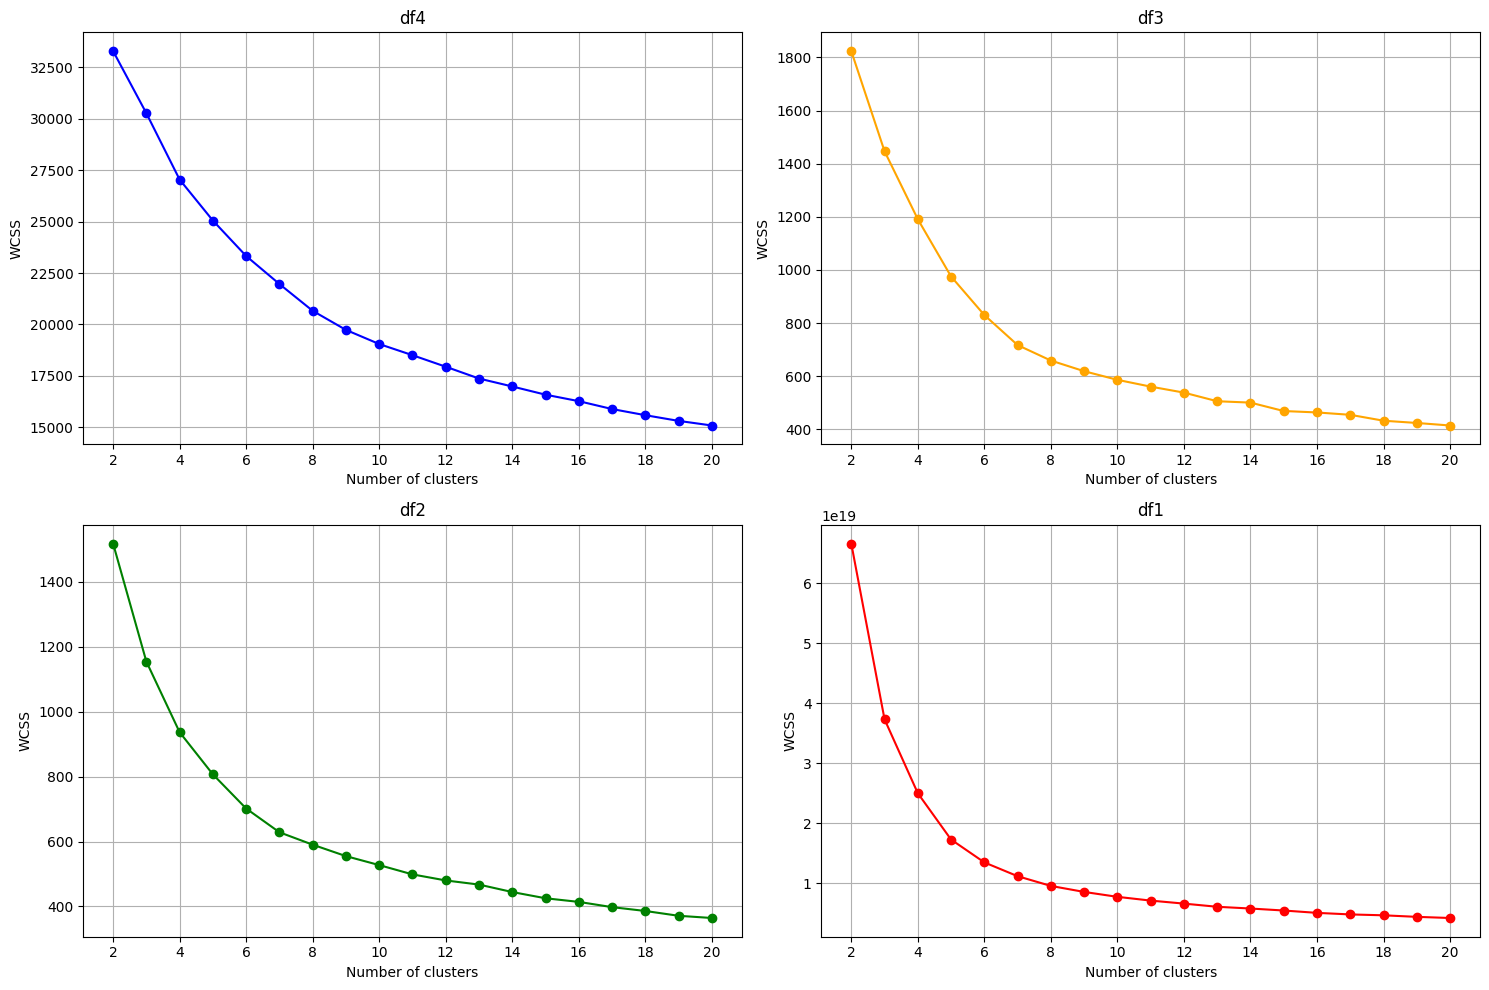

In [5]:

def calculate_wcss(data):
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)
    return wcss

# Assuming v1, v2, v3, and v4 are your datasets
wcss_df4 = calculate_wcss(df4)
wcss_df3 = calculate_wcss(df3)
wcss_df2 = calculate_wcss(df2)
wcss_df1 = calculate_wcss(df1)


# Assuming wcss_v1, wcss_v2, wcss_v3, and wcss_v4 are defined lists
wcss_list = [wcss_df4, wcss_df3, wcss_df2, wcss_df1]
titles = ['df4', 'df3', 'df2', 'df1']
colors = ['b', 'orange', 'green', 'r']

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, (wcss, title, color) in enumerate(zip(wcss_list, titles, colors)):
    row = i // 2
    col = i % 2
    axs[row, col].plot(range(2, 21), wcss, marker='o', color=color)
    axs[row, col].set_title(title)
    axs[row, col].set_xlabel('Number of clusters')
    axs[row, col].set_ylabel('WCSS')
    axs[row, col].set_xticks(range(2, 22, 2))  # Set x-ticks every 2 units
    axs[row, col].grid()

plt.tight_layout()
plt.show()



zdecydowaliśmy się na 7 klastrów.

### Modelowanie

In [9]:
# wypróbuj różne metoday klasteryzacji dla N klastrów
def perform_clustering1(df4, N, df4_results,eps):
    # KMeans
    # how does KMeans work
    # 1. Randomly initialize the centroids
    # 2. Assign each data point to the closest centroid
    # 3. Recompute the centroids
    # 4. Repeat steps 2 and 3 until convergence

    kmeans = KMeans(n_clusters=N)
    kmeans.fit(df4)
    df4_results['kmeans'] = kmeans.labels_

    # AgglomerativeClustering
    # how does AgglomerativeClustering work
    # 1. Start with n clusters, each data point is a cluster
    # 2. Merge the two closest clusters
    # 3. Repeat step 2 until only a single cluster remains

    agglomerative = AgglomerativeClustering(n_clusters=N)
    agglomerative.fit(df4)
    df4_results['agglomerative'] = agglomerative.labels_

    # DBSCAN
    # how does DBSCAN work
    # 1. Randomly initialize a point
    # 2. Find all points within the eps distance from the point
    # 3. If there are more than min_samples points within eps distance, create a cluster
    # 4. Repeat steps 2 and 3 until all points are visited
    # find best eps and min_samples
    # eps - maximum distance between two samples for one to be considered as in the neighborhood of the other
    # min_samples - number of samples in a neighborhood for a point to be considered as a core point

    # function fo finding best eps and min_samples
    def find_best_eps_min_samples(data,eps):
        from sklearn.neighbors import NearestNeighbors
        neigh = NearestNeighbors(n_neighbors=2)
        neigh.fit(data)
        distances, indices = neigh.kneighbors(data)
        distances = np.sort(distances, axis=0)
        distances = distances[:, 1]
        plt.plot(distances)
        plt.axhline(y=eps, color='r', linestyle='--')
        plt.title('Distances for DBSCAN')
        plt.show()

    find_best_eps_min_samples(df4,eps)
    #what does the plot show
    # the plot shows the distances between each point and its closest neighbor
    # the point where the plot starts to grow rapidly is the best eps value


    dbscan = DBSCAN(eps=eps, min_samples=6) # dla innych danych trzeba zmienić eps i min_samples DB4 eps=2, min_samples=6, DB3 eps=0.3
    dbscan.fit(df4)
    df4_results['dbscan'] = dbscan.labels_

    # Birch
    # how is Birch different from KMeans
    # 1. Birch builds a tree structure to represent the data
    # 2. Birch does not require the number of clusters to be specified
    # 3. Birch does not require the data to be stored in memory
    # 4. Birch is faster than KMeans
    # ale generalnie Birch działa na podobnej zasadzie co KMeans

    birch = Birch(n_clusters=N)
    birch.fit(df4)
    df4_results['birch'] = birch.labels_

    # MiniBatchKMeans
    # how does MiniBatchKMeans work
    # MiniBatchKMeans uses mini-batches of data to update the centroids (other than that works like KMeans)

    mini_batch_kmeans = MiniBatchKMeans(n_clusters=N)
    mini_batch_kmeans.fit(df4)
    df4_results['mini_batch_kmeans'] = mini_batch_kmeans.labels_



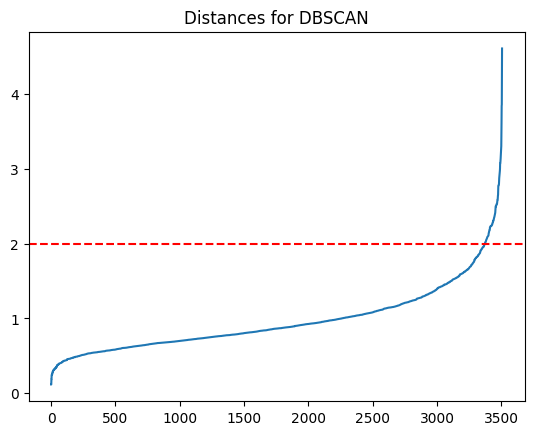

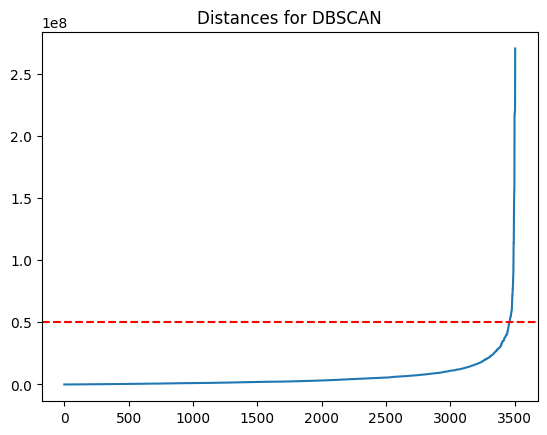

In [10]:
df4_results = pd.DataFrame()
df1_results = pd.DataFrame()
perform_clustering1(df4, 7, df4_results,2)
perform_clustering1(df1, 7, df1_results,50000000)

Na podstawie powyższego wykresu widać, że najsensowniej wybrać wartość eps jako 2, ponieważ tam zaczyna rosnąć najszybiciej.

In [11]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
df4_tsne = tsne.fit_transform(df4)
df3_tsne = tsne.fit_transform(df3)
df2_tsne = tsne.fit_transform(df2)
df1_tsne = tsne.fit_transform(df1)
df5_tsne = tsne.fit_transform(df5)

# use standard scaler for PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df4_s = scaler.fit_transform(df4)
df3_s = scaler.fit_transform(df3)
df2_s = scaler.fit_transform(df2)
df1_s = scaler.fit_transform(df1)
df5_s = scaler.fit_transform(df5)

pca = PCA(n_components=2)
df4_pca = pca.fit_transform(df4_s)
df3_pca = pca.fit_transform(df3_s)
df2_pca = pca.fit_transform(df2_s)
df1_pca = pca.fit_transform(df1_s)
df5_pca = pca.fit_transform(df5_s)


pca = PCA(n_components=3)
df4_pca2 = pca.fit_transform(df4_s)
df3_pca2 = pca.fit_transform(df3_s)
df2_pca2 = pca.fit_transform(df2_s)
df1_pca2 = pca.fit_transform(df1_s)
df5_pca2 = pca.fit_transform(df5_s)


Trenujemy PCA i tSNE.

In [12]:
def plot_clusters(df4, df4_pca, df4_pca2, df4_tsne): # Plotujemy 5 ostatnich kolumn
    # Plot the results using TSNE
    fig, axs = plt.subplots(5, 2, figsize=(15, 15))

    for i, (col, ax) in enumerate(zip(df4.columns[-10:], axs.flatten())):
        ax.scatter(df4_tsne[:, 0], df4_tsne[:, 1], c=df4[col], cmap='tab10')
        ax.set_title(col)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

    # Plot the results using PCA
    fig, axs = plt.subplots(5, 2, figsize=(15, 15))

    for i, (col, ax) in enumerate(zip(df4.columns[-10:], axs.flatten())):
        ax.scatter(df4_pca[:, 0], df4_pca[:, 1], c=df4[col], cmap='tab10')
        ax.set_title(col)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

    # Plot the results using PCA2 in 3d using plotly express
    import plotly.express as px
    import plotly.io as pio
    pio.renderers.default = 'browser'
    
    for i, col in enumerate(df4.columns[-10:]):
        fig = px.scatter_3d(x=df4_pca2[:, 0], y=df4_pca2[:, 1], z=df4_pca2[:, 2], color=df4[col])
        fig.show()

In [13]:
def perform_clustering2(df4, N, df4_results):
    # MeanShift
    # how does MeanShift work
    # 1. Randomly initialize the centroids
    # 2. Find the points within the bandwidth distance from the centroid
    # 3. Recompute the centroid as the mean of the points within the bandwidth distance
    # 4. Repeat steps 2 and 3 until convergence

    # what is bandwidth
    # bandwidth is the distance within which the points are considered to be close to each other
    # points outside the bandwidth distance are considered to be outliers

    # how is it different from KMeans
    # 1. MeanShift does not require the number of clusters to be specified
    # 2. MeanShift does not require the data to be stored in memory
    # 3. MeanShift is slower than KMeans

    mean_shift = MeanShift()
    mean_shift.fit(df4)
    df4_results['mean_shift'] = mean_shift.labels_

    # SpectralClustering
    # how does SpectralClustering work
    # 1. Construct a similarity matrix
    # 2. Compute the Laplacian matrix
    # 3. Compute the eigenvectors of the Laplacian matrix
    # 4. Use the eigenvectors to cluster the data

    spectral_clustering = SpectralClustering(n_clusters=N)
    spectral_clustering.fit(df4)
    df4_results['spectral_clustering'] = spectral_clustering.labels_

    # AffinityPropagation
    # how does AffinityPropagation work
    # 1. Compute the similarity matrix
    # 2. Compute the availability matrix
    # 3. Compute the responsibility matrix
    # 4. Compute the cluster centers
    # 5. Assign each data point to the closest cluster center

    affinity_propagation = AffinityPropagation()
    affinity_propagation.fit(df4)
    df4_results['affinity_propagation'] = affinity_propagation.labels_

    # OPTICS
    # how does OPTICS work
    # 1. Construct a reachability graph
    # 2. Compute the ordering of the points
    # 3. Extract the clusters from the ordering

    optics = OPTICS(min_samples=5)
    optics.fit(df4)
    df4_results['optics'] = optics.labels_

    # GaussianMixture
    # how does GaussianMixture work
    # 1. Initialize the parameters of the Gaussian distribution
    # 2. Compute the probability of each data point belonging to each cluster
    # 3. Update the parameters of the Gaussian distribution
    # 4. Repeat steps 2 and 3 until convergence
    
    gaussian_mixture = GaussianMixture(n_components=3)
    gaussian_mixture.fit(df4)
    df4_results['gaussian_mixture'] = gaussian_mixture.predict(df4)

Dodajemy więcej modeli do przetestowania.

In [14]:
perform_clustering2(df4, 7, df4_results)
perform_clustering2(df1, 7, df1_results)

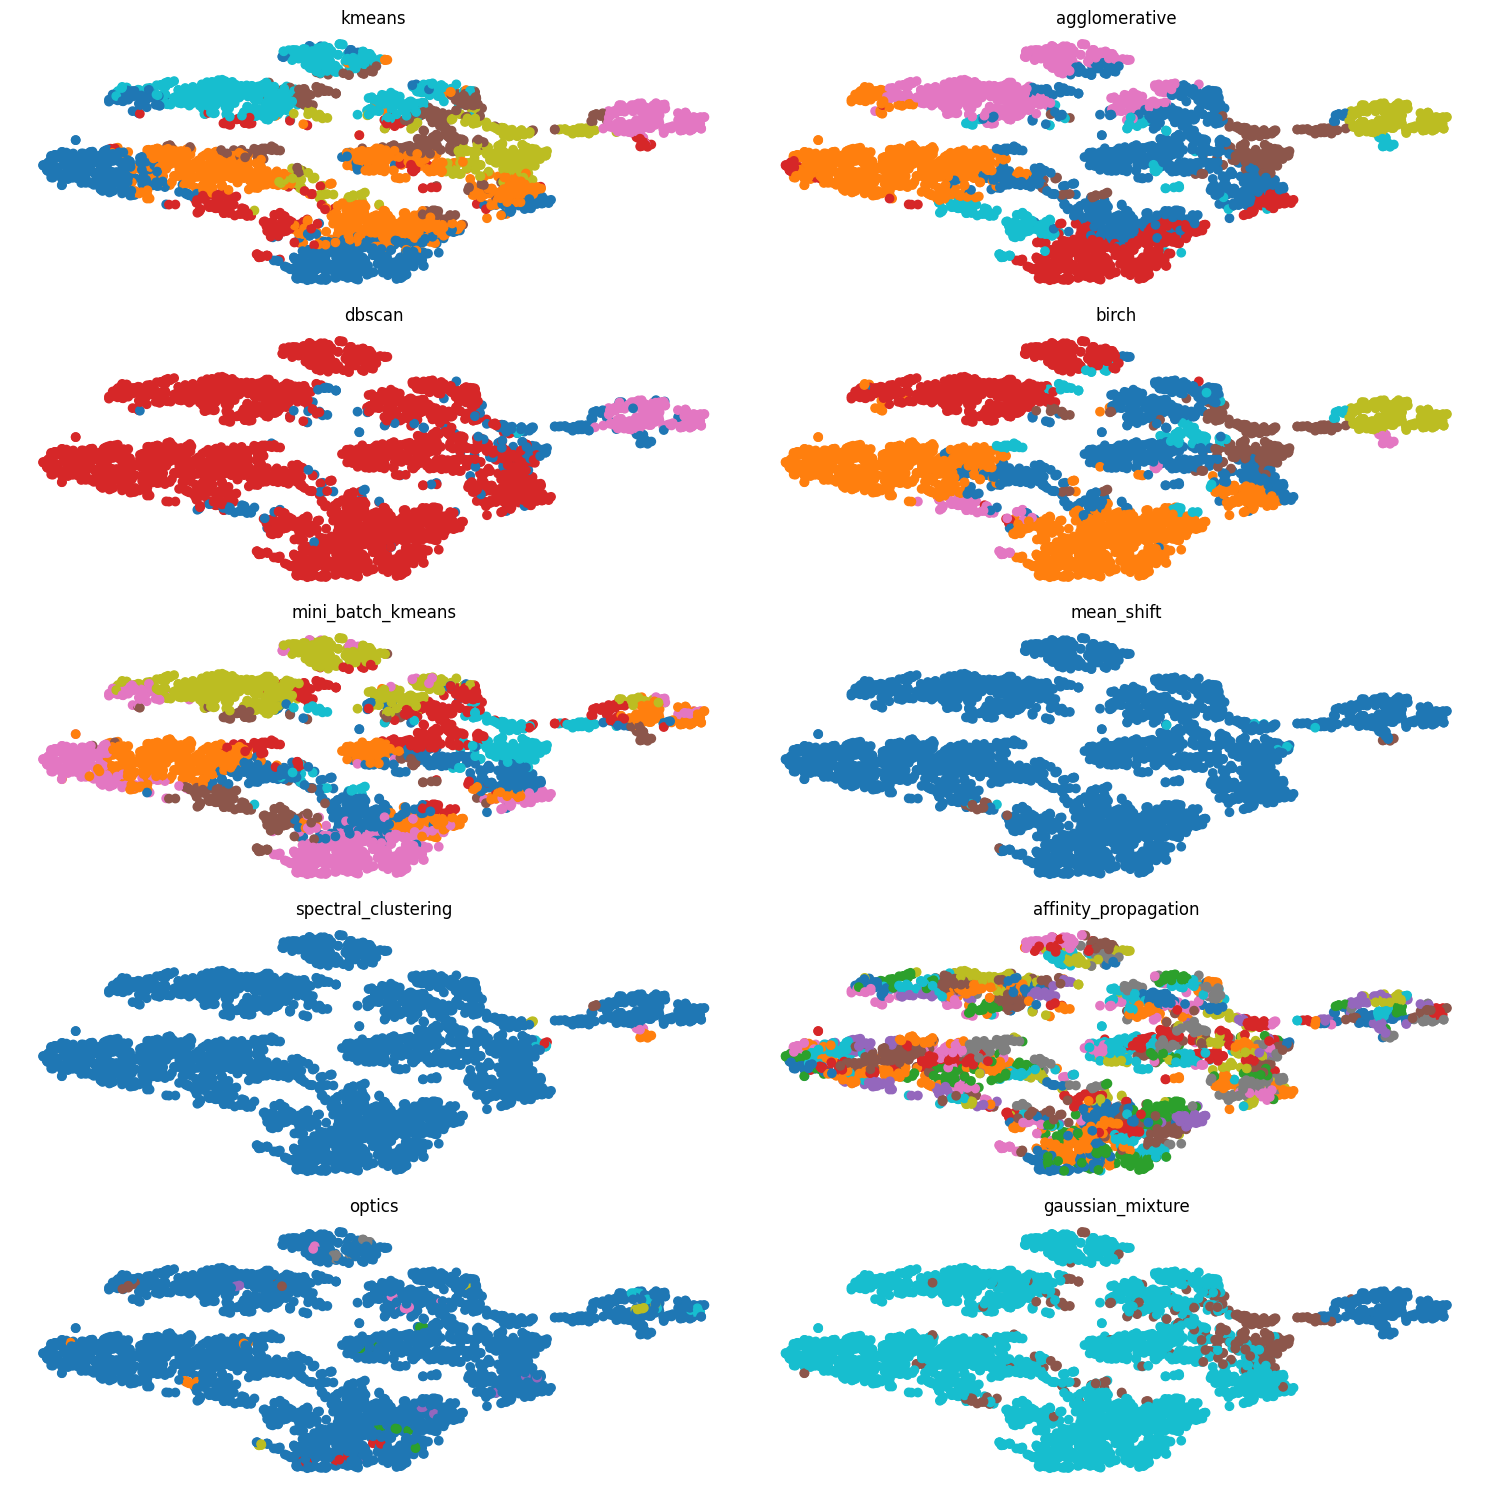

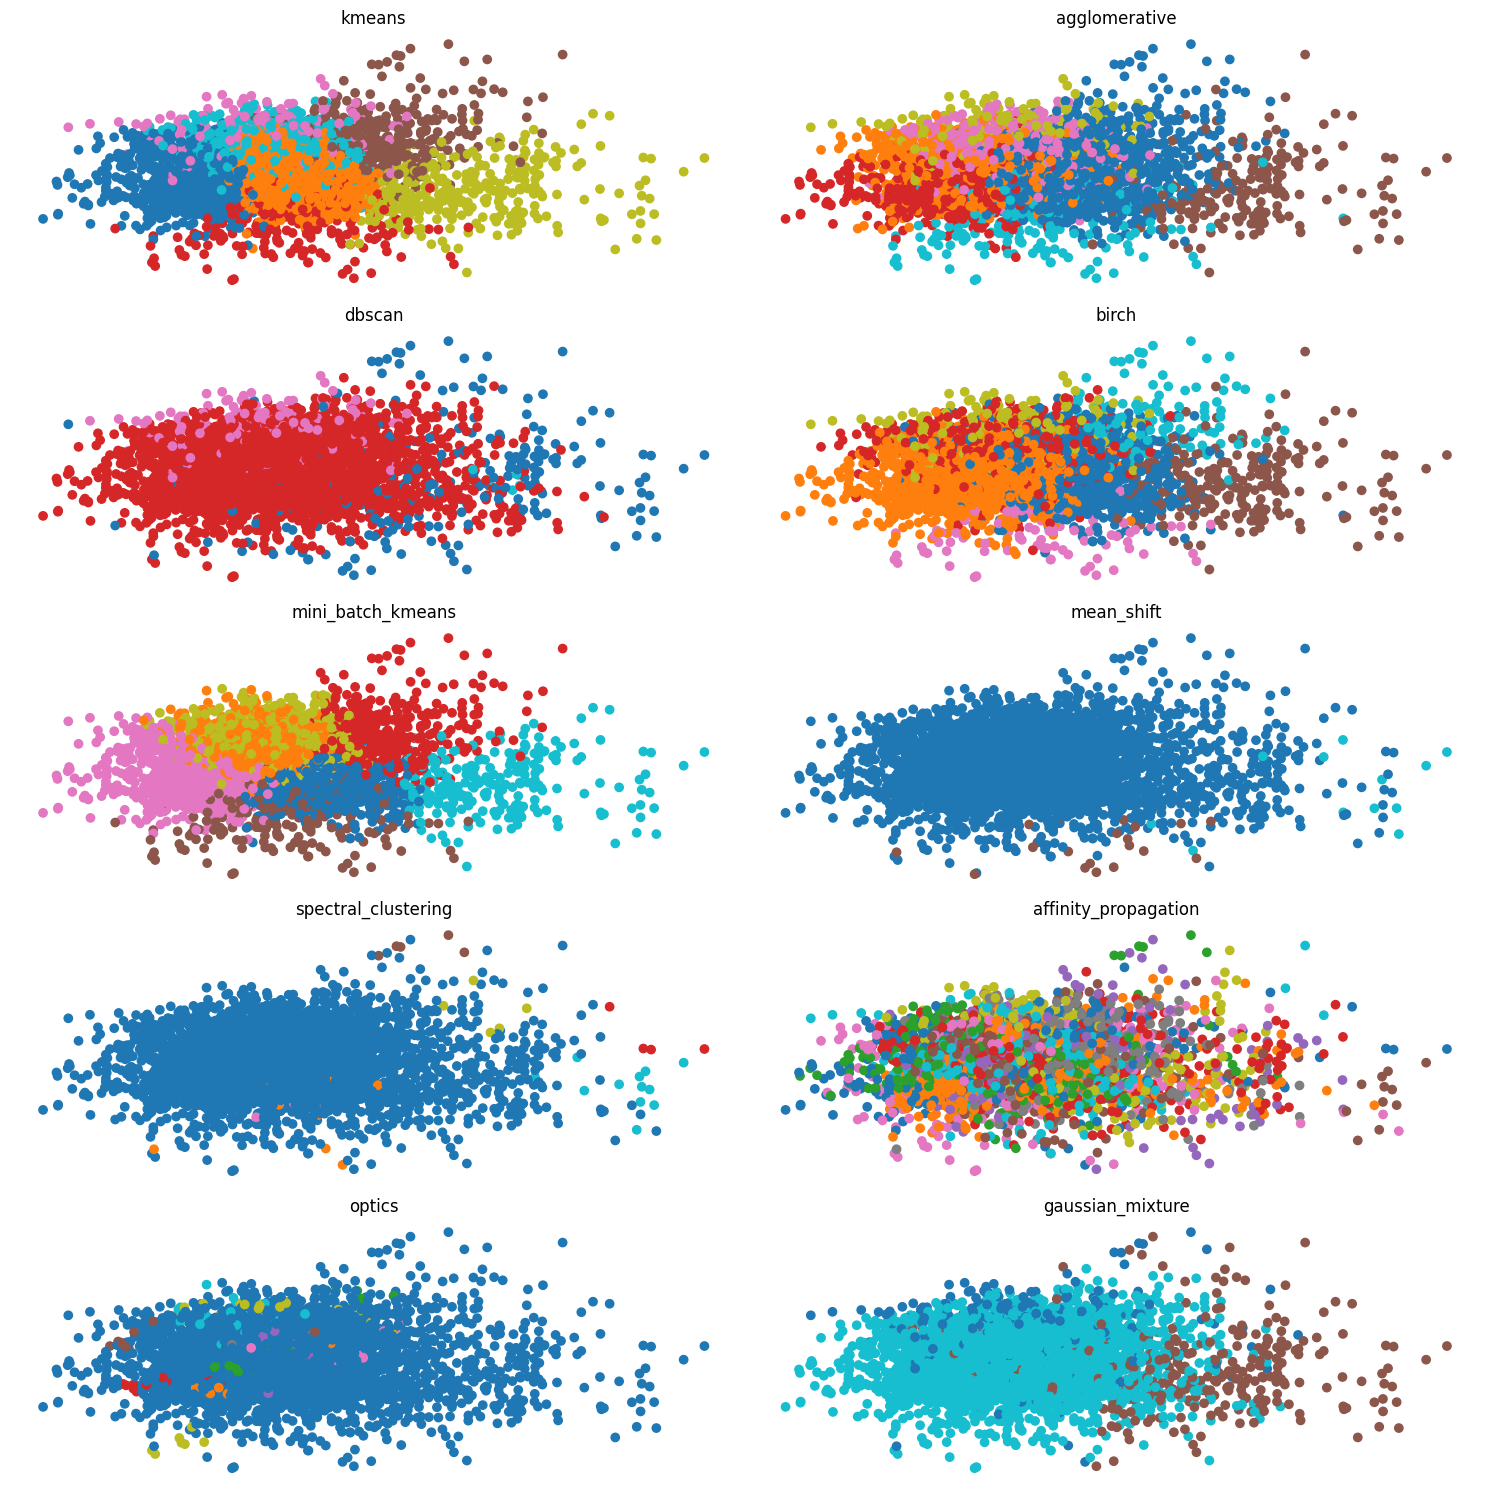

In [15]:
plot_clusters(df4_results, df4_pca, df4_pca2, df4_tsne)

Rysujemy wykresy przedstawiające podział na klastry.

In [16]:
# create a table analysing the results using silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score

def calculate_scores(df, df_results):
    scores = pd.DataFrame(index=df_results.columns, columns=['silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score'])
    for col in df_results.columns:
        labels = df_results[col]
        if len(set(labels)) > 1:  # check if there is more than one cluster
            scores.loc[col, 'silhouette_score'] = silhouette_score(df, labels)
            scores.loc[col, 'calinski_harabasz_score'] = calinski_harabasz_score(df, labels)
            scores.loc[col, 'davies_bouldin_score'] = davies_bouldin_score(df, labels)
    return scores

Funkcja sprawdzająca wyniki poszczególnych modeli.

In [17]:
df4_results

kmeans  agglomerative  dbscan  birch  mini_batch_kmeans  mean_shift  \
0          1              0       0      0                  0           0   
1          6              4       0      2                  5           0   
2          0              2       0      1                  4           0   
3          2              1       0      1                  3           0   
4          6              0       0      1                  5           0   
...      ...            ...     ...    ...                ...         ...   
3501       1              1       0      1                  0           0   
3502       6              4       0      2                  5           0   
3503       0              2       0      1                  4           0   
3504       1              0       0      0                  1           0   
3505       1              0       0      1                  1           0   

      spectral_clustering  affinity_propagation  optics  gaussian_mixture  
0                       0                    21      -1                 2  
1                       0                   155      -1                 2  
2                       0                    30      -1                 2  
3                       0                    82      -1                 2  
4                       0                   143      -1                 1  
...                   ...                   ...     ...               ...  
3501                    0                    61      -1                 2  
3502                    0                    22      -1                 2  
3503                    0                    18      -1                 2  
3504                    0                   145      -1                 2  
3505                    0                   129      -1                 2  

[3506 rows x 10 columns]

In [18]:
df1_results

kmeans  agglomerative  dbscan  birch  mini_batch_kmeans  mean_shift  \
0          0              6       0      6                  6           0   
1          5              5       0      5                  4           0   
2          5              5       0      5                  4           0   
3          2              5       0      5                  4           0   
4          5              4       0      4                  5           0   
...      ...            ...     ...    ...                ...         ...   
3501       0              4       0      4                  5           0   
3502       5              5       0      5                  4           0   
3503       5              4       0      4                  5           0   
3504       0              4       0      4                  5           0   
3505       5              4       0      4                  5           0   

      spectral_clustering  affinity_propagation  optics  gaussian_mixture  
0                       1                     0       0                 0  
1                       6                   160      -1                 2  
2                       0                    18      -1                 1  
3                       4                   253      -1                 1  
4                       5                   116      -1                 1  
...                   ...                   ...     ...               ...  
3501                    4                   306      75                 1  
3502                    5                   179      -1                 1  
3503                    0                   107      -1                 1  
3504                    1                   306      -1                 0  
3505                    1                   235      -1                 1  

[3506 rows x 10 columns]

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [27]:
def calculate_best_model(scores):
    scaler = MinMaxScaler()
    epsilon = 1e-5

    # Przeskalowanie kolumny 'calinski_harabasz_score'
    scores['calinski_harabasz_score_scaled'] = scaler.fit_transform(scores[['calinski_harabasz_score']])
    scores['calinski_harabasz_score_scaled'] = scores['calinski_harabasz_score_scaled'] * (1 - 2 * epsilon) + epsilon

    # Przeskalowanie kolumny 'davies_bouldin_score'
    scores['davies_bouldin_score_scaled'] = scaler.fit_transform(scores[['davies_bouldin_score']])
    scores['davies_bouldin_score_scaled'] = scores['davies_bouldin_score_scaled'] * (1 - 2 * epsilon) + epsilon

    scores = scores[scores['silhouette_score'] > 0]

    # Silhouette score
    max_silhouette_score = scores['silhouette_score'].max()
    scores['silhouette_score_scaled'] = scores['silhouette_score'] / max_silhouette_score
    scores.loc[scores['silhouette_score'] == max_silhouette_score, 'silhouette_score_scaled'] = 1

    # Calinski-Harabasz score
    max_calinski_score = scores['calinski_harabasz_score_scaled'].max()
    scores['calinski_score_scaled'] = scores['calinski_harabasz_score_scaled'] / max_calinski_score
    scores.loc[scores['calinski_harabasz_score_scaled'] == max_calinski_score, 'calinski_score_scaled'] = 1  

    # Davies-Bouldin score
    min_davies_score = scores['davies_bouldin_score_scaled'].min()
    scores['davies_score_scaled'] = 1 - min_davies_score / scores['davies_bouldin_score_scaled'] 
    scores.loc[scores['davies_bouldin_score_scaled'] == min_davies_score, 'davies_score_scaled'] = 1   

    # Suma
    scores['suma'] = scores['silhouette_score_scaled'] + scores['calinski_score_scaled'] + scores['davies_score_scaled']

    # Zapewnienie, że kolumna 'suma' jest typu float
    scores['suma'] = scores['suma'].astype(float)

    # Indeks najlepszego algorytmu
    best_algorithm_index = scores['suma'].idxmax()
    return best_algorithm_index


Funkjca do wyboru najlepszego modelu.

In [21]:
scores_df4 = calculate_scores(df4, df4_results)
print(scores_df4)

                     silhouette_score calinski_harabasz_score  \
kmeans                       0.157173              533.793035   
agglomerative                0.119197              439.370465   
dbscan                       0.227346               218.00668   
birch                        0.140588              422.930777   
mini_batch_kmeans            0.135394              458.327325   
mean_shift                   0.371101                 54.2612   
spectral_clustering          0.292428               31.672814   
affinity_propagation         0.127554              101.217509   
optics                      -0.463267                6.111976   
gaussian_mixture             0.265906              415.495209   

                     davies_bouldin_score  
kmeans                           1.668952  
agglomerative                    1.741751  
dbscan                           1.752422  
birch                             1.70906  
mini_batch_kmeans                1.872539  
mean_shift          

Wypisujemy wyniki jakie otrzymały poszczególne modele dla ramki danych df4.

In [22]:
scores_df1 = calculate_scores(df1, df1_results)
print(scores_df1)

                     silhouette_score calinski_harabasz_score  \
kmeans                       0.501864             7788.496348   
agglomerative                0.421027             6941.199597   
dbscan                       0.758833             1940.795344   
birch                        0.421027             6941.199597   
mini_batch_kmeans            0.329793             5045.189154   
mean_shift                   0.688682              888.209209   
spectral_clustering         -0.197361                1.851681   
affinity_propagation         0.195189             1570.596483   
optics                      -0.417799                5.953899   
gaussian_mixture             0.004944               216.47386   

                     davies_bouldin_score  
kmeans                           0.713709  
agglomerative                    0.752019  
dbscan                           1.189924  
birch                            0.752019  
mini_batch_kmeans                0.827793  
mean_shift          

Wypisujemy wyniki jakie otrzymały poszczególne modele dla ramki danych df1 i porównujemy wyniki z obu tych ramek.

Widać, że najlepiej radzi sobie model mean_shift i kmeans. 

In [23]:
# plot the results
def plot_scores(scores):
    fig, axs = plt.subplots(1, 3, figsize=(15, 10))

    for i, (score, ax) in enumerate(zip(scores.columns, axs.flatten())):
        ax.bar(scores.index, scores[score])
        ax.set_title(score)
        ax.set_xticklabels(scores.index, rotation=45)
        ax.grid()
    plt.tight_layout()
    plt.show()

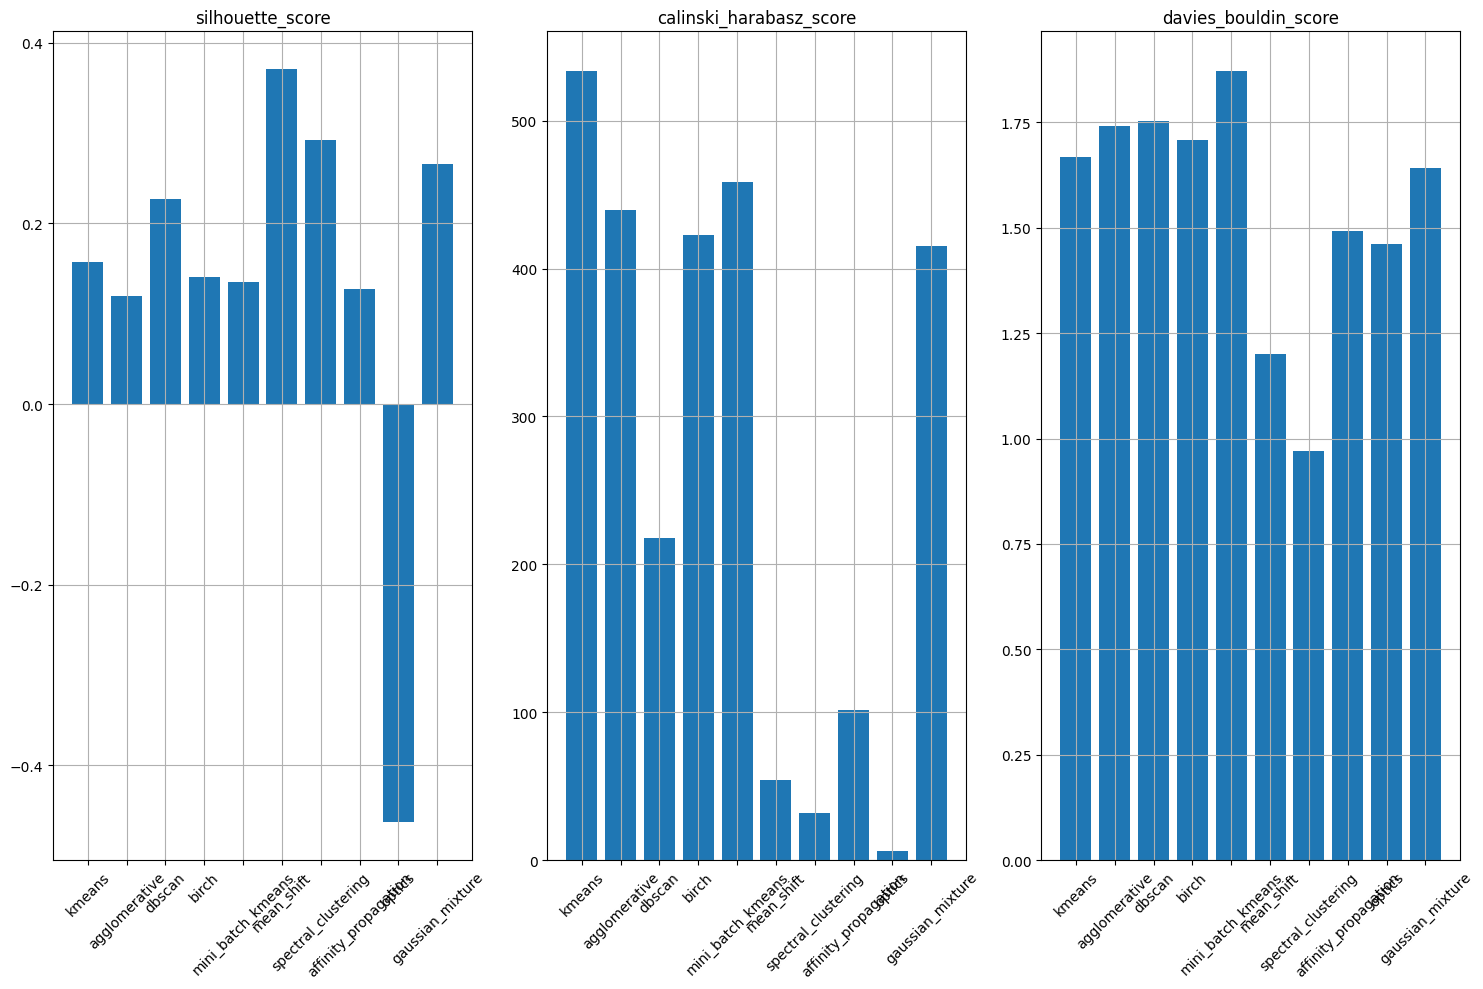

In [24]:
scores_df4 = calculate_scores(df4, df4_results)
plot_scores(scores_df4)

In [28]:
calculate_best_model(scores_df4)

'gaussian_mixture'

Najlepszy model dla ramki danych df4.

In [29]:
calculate_best_model(scores_df1)

'kmeans'

Najlepszy model dla ramki danych df1.

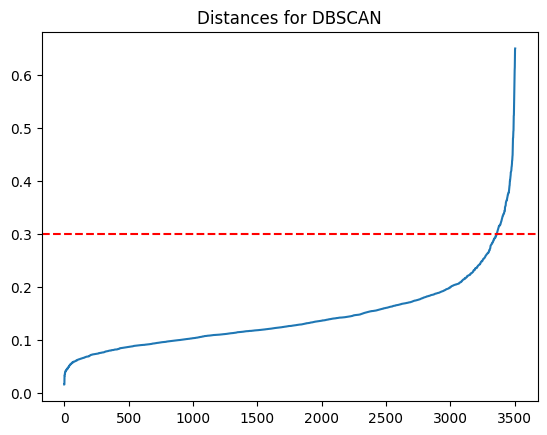

                     silhouette_score calinski_harabasz_score  \
kmeans                       0.393054             1438.382724   
agglomerative                0.371785             1321.856699   
dbscan                        0.09418              316.198504   
birch                        0.316599              741.336045   
mini_batch_kmeans            0.393011             1438.319996   
mean_shift                   0.312671              559.444098   
spectral_clustering          0.361127              1077.91233   
affinity_propagation          0.16094               391.18903   
optics                      -0.564948               10.662378   
gaussian_mixture             0.261154             1117.816467   

                     davies_bouldin_score  
kmeans                           0.984198  
agglomerative                    1.045844  
dbscan                           1.521899  
birch                            1.252742  
mini_batch_kmeans                0.985965  
mean_shift          

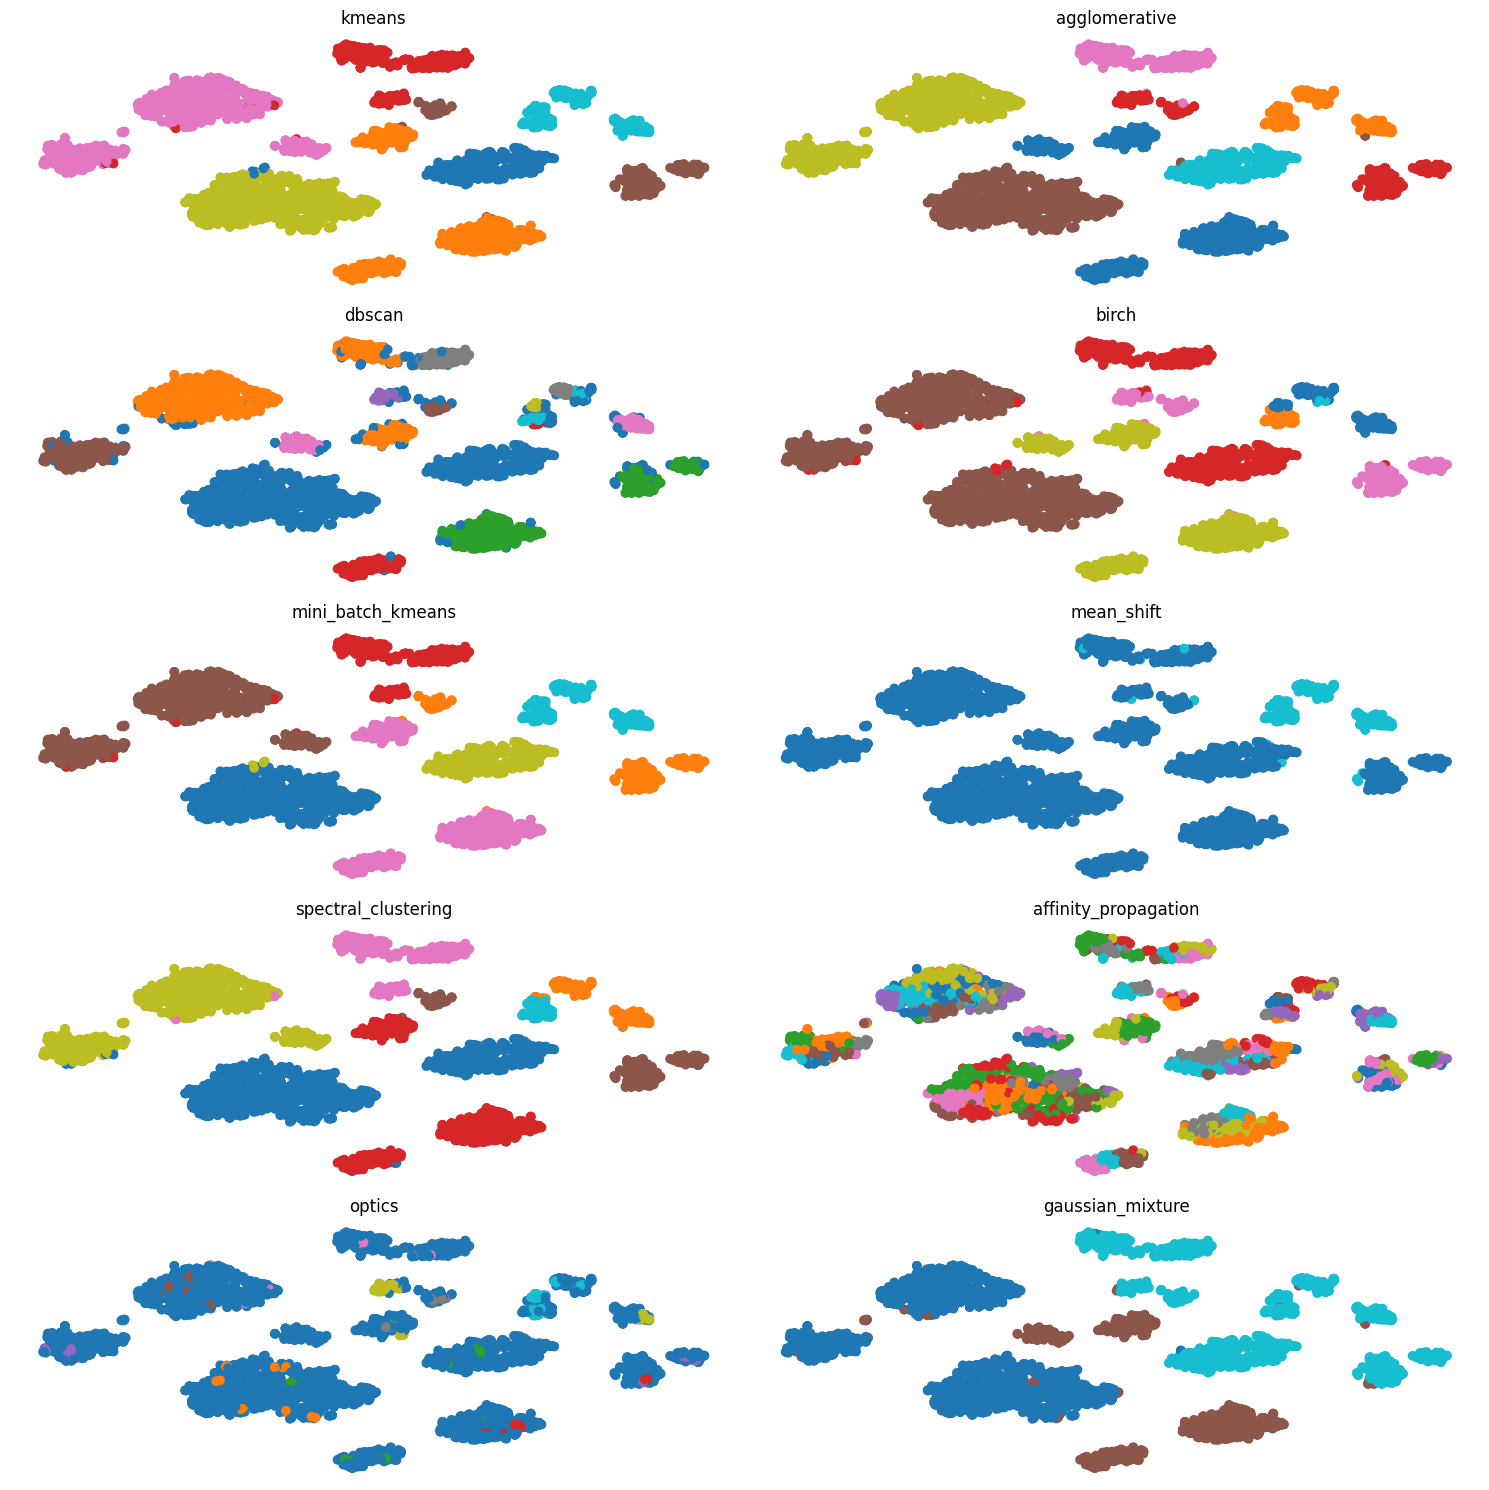

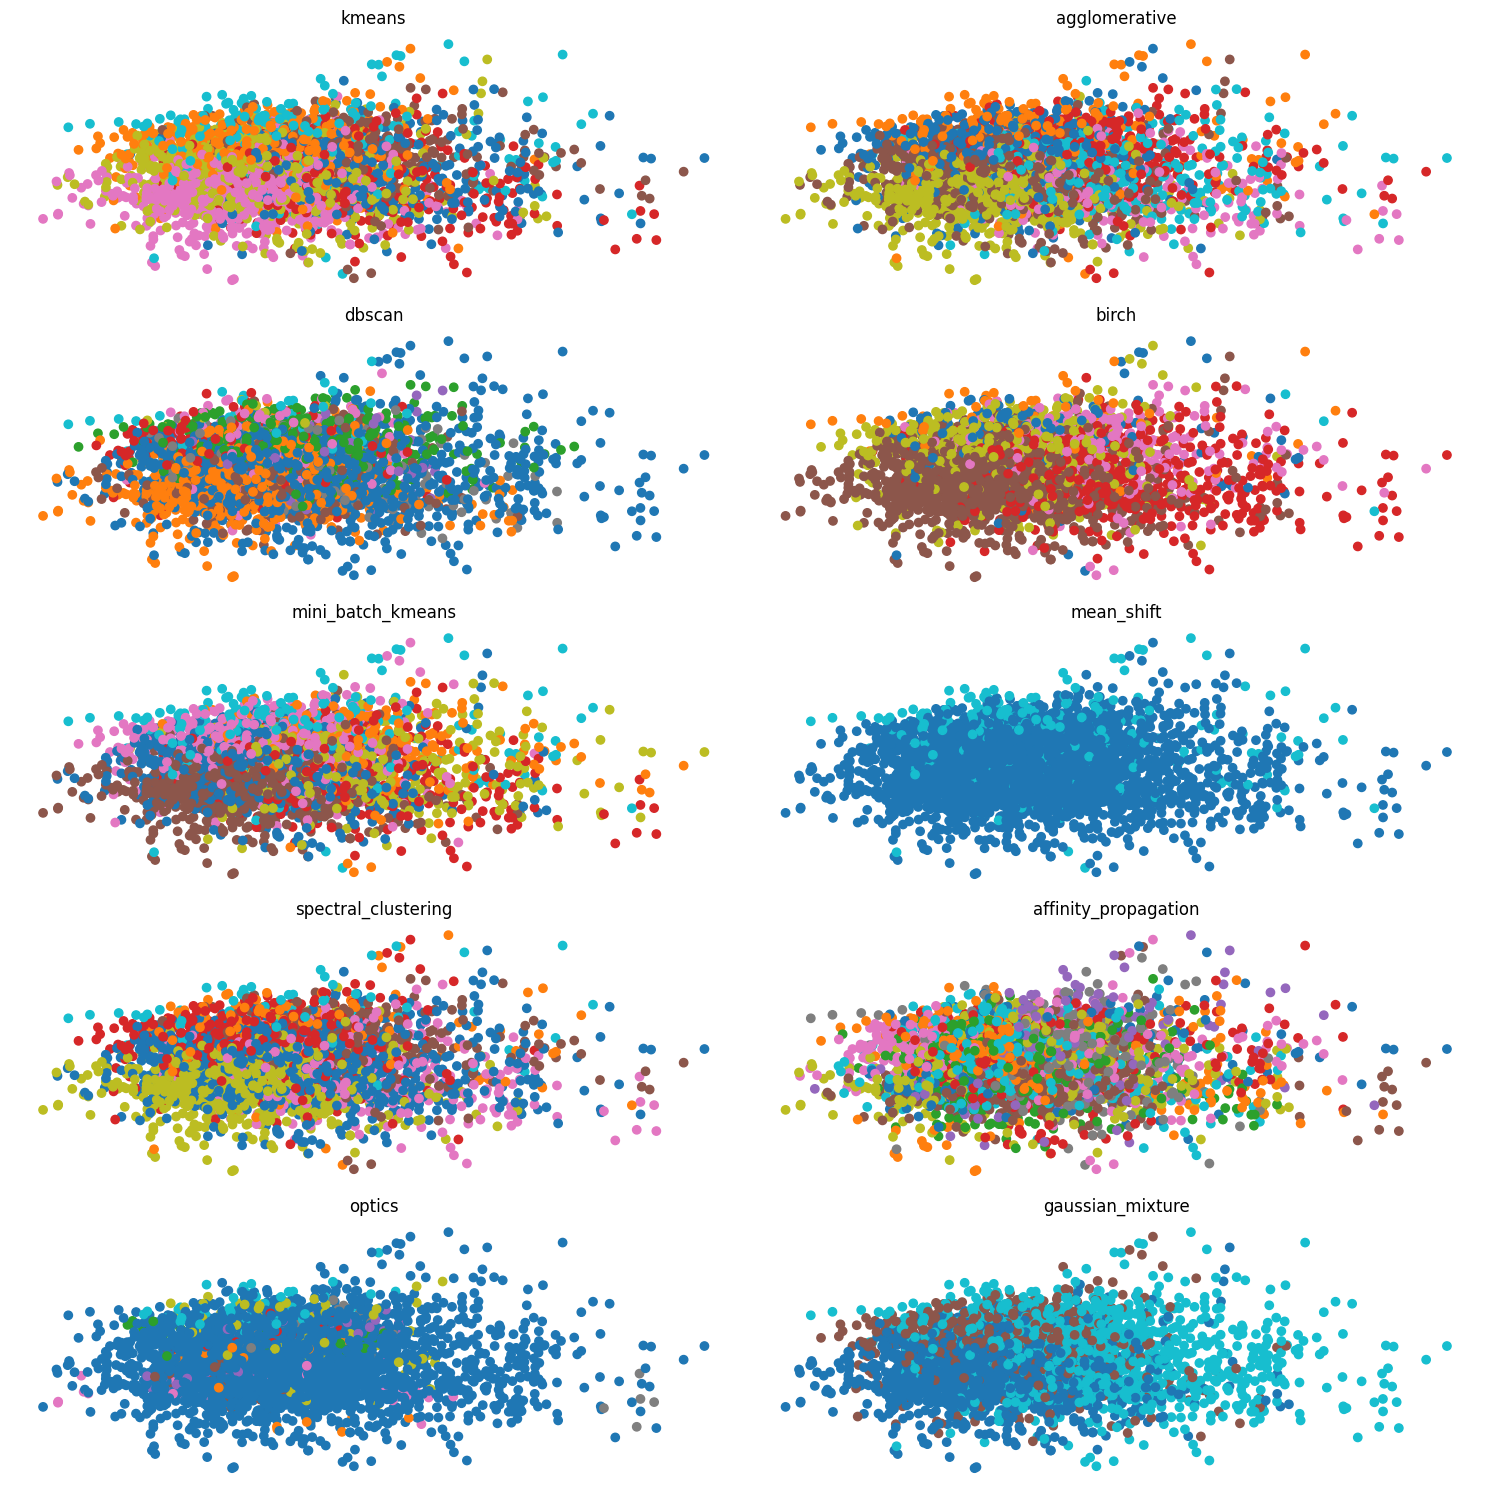

In [30]:
#wyżej sprawdzone tylko dla df4, teraz dla df3
#uwaga trzeba recznie w dbscanie w perform_clustering1 zmienić eps na lepsze, bo inaczej nie działa dobrze, dla df3 np były dobry 0.30 na oko eps
df3_results = pd.DataFrame()
perform_clustering1(df3, 7, df3_results,0.3)
perform_clustering2(df3, 7, df3_results)
scores_df3 = calculate_scores(df3, df3_results)
print(scores_df3)

# plot the results
plot_clusters(df3_results,df3_pca, df3_pca2, df3_tsne)

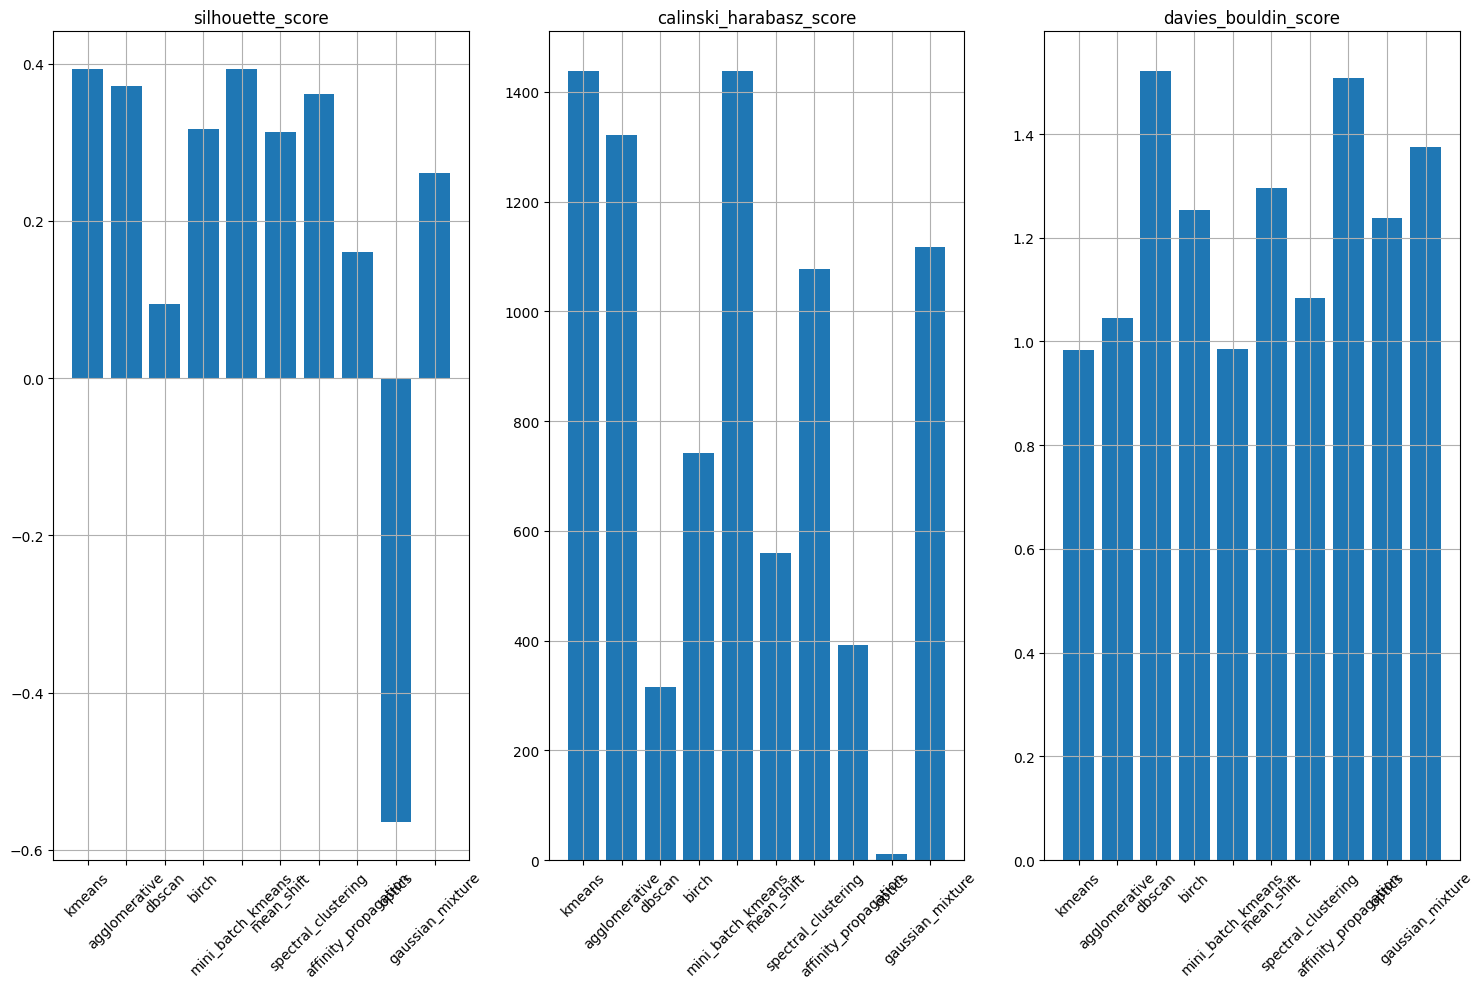

In [31]:
plot_scores(scores_df3)

In [32]:
calculate_best_model(scores_df3)

'kmeans'

Sprawdzamy wyniki dla ramki danych df3.

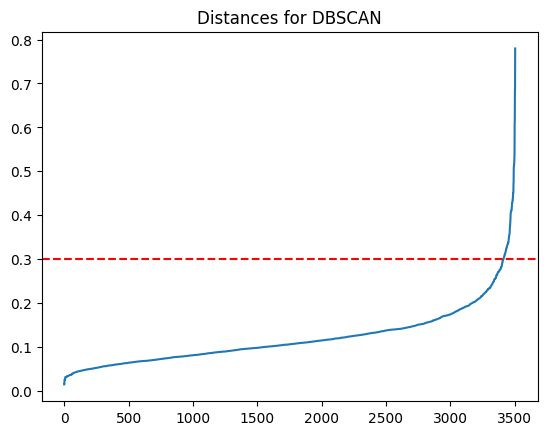

                     silhouette_score calinski_harabasz_score  \
kmeans                       0.308072             1308.769371   
agglomerative                0.263196             1097.148241   
dbscan                        0.22593              408.997154   
birch                        0.279069              361.004255   
mini_batch_kmeans            0.309071             1172.076357   
mean_shift                   0.324197              570.878707   
spectral_clustering          0.322403             1104.531446   
affinity_propagation          0.18475              393.420575   
optics                      -0.516143               11.429369   
gaussian_mixture             0.169414              430.887498   

                     davies_bouldin_score  
kmeans                           1.150088  
agglomerative                    1.243363  
dbscan                           1.671115  
birch                            1.019096  
mini_batch_kmeans                1.223329  
mean_shift          

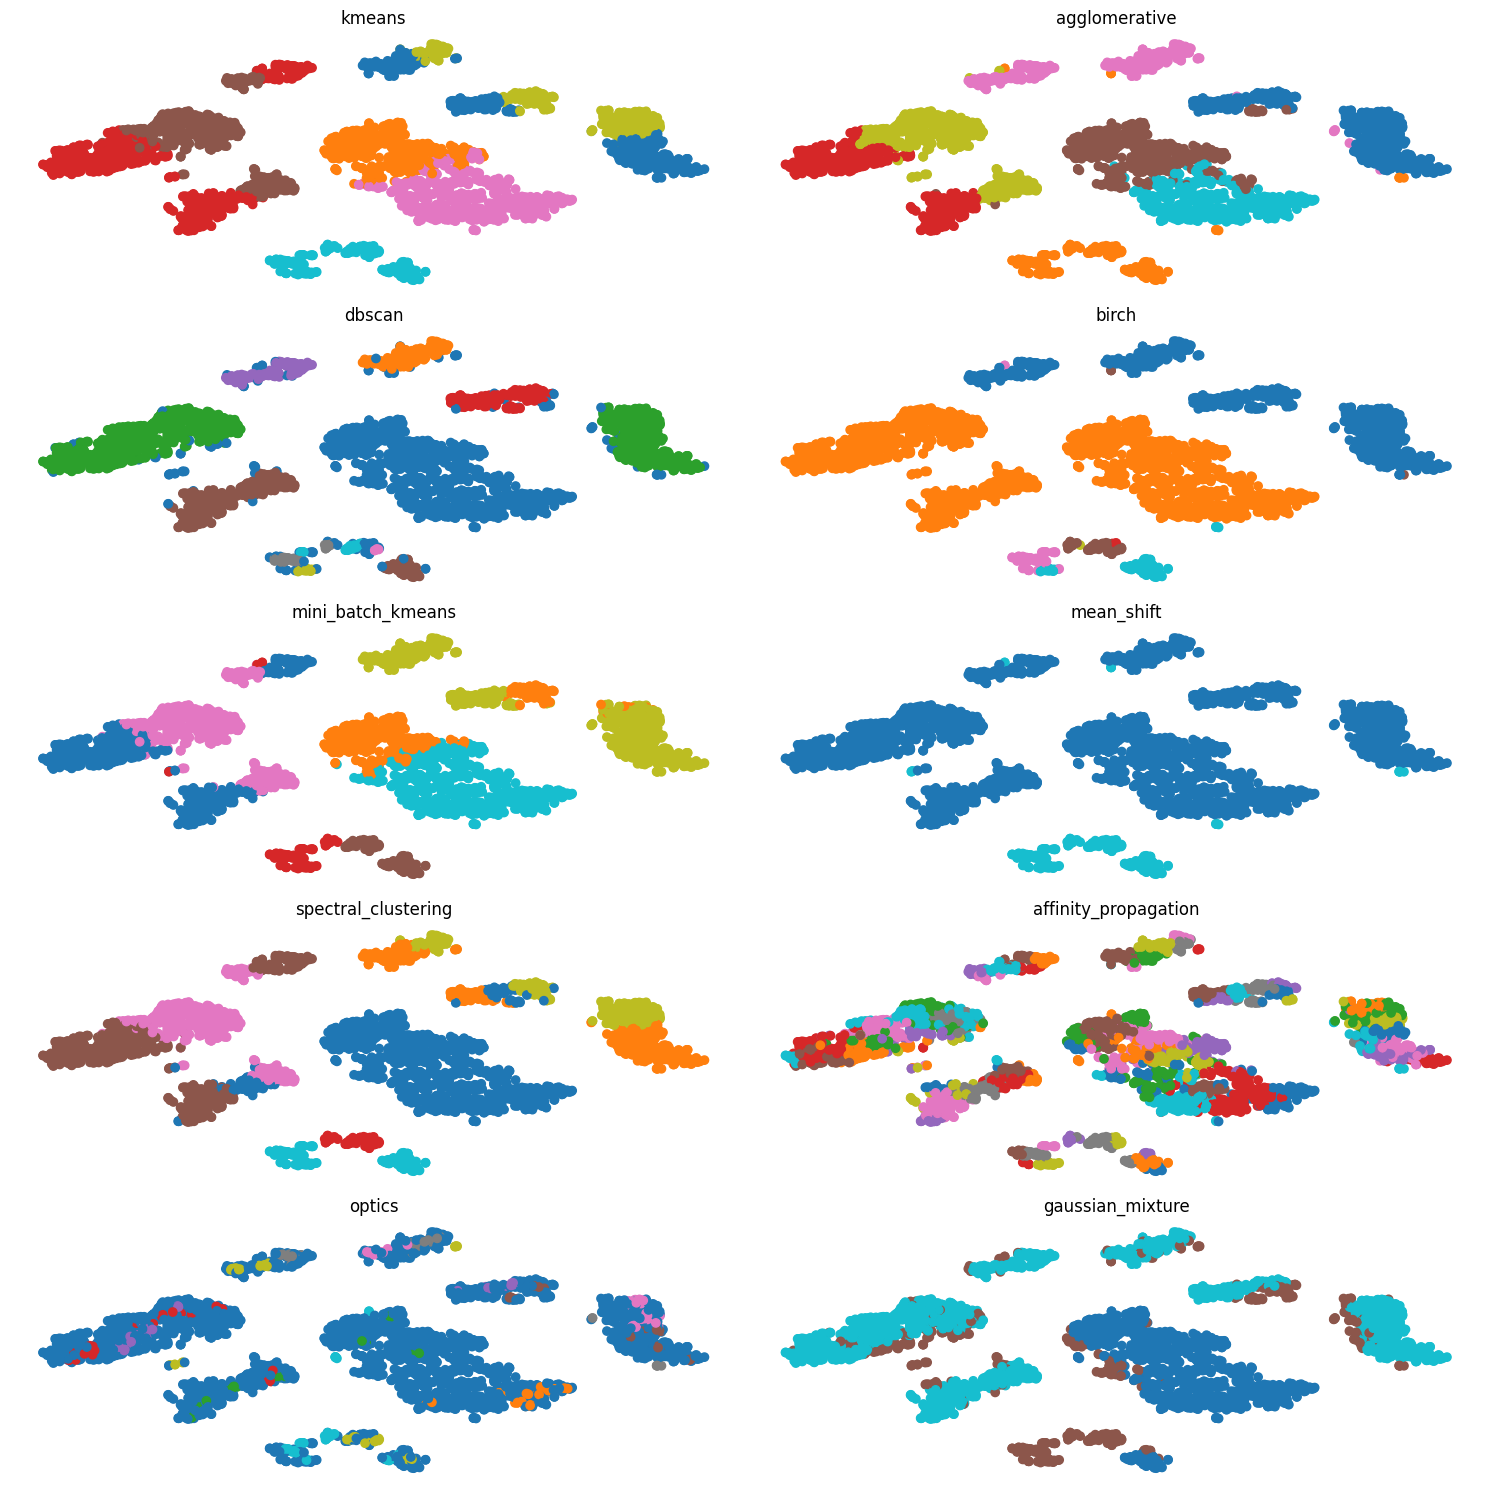

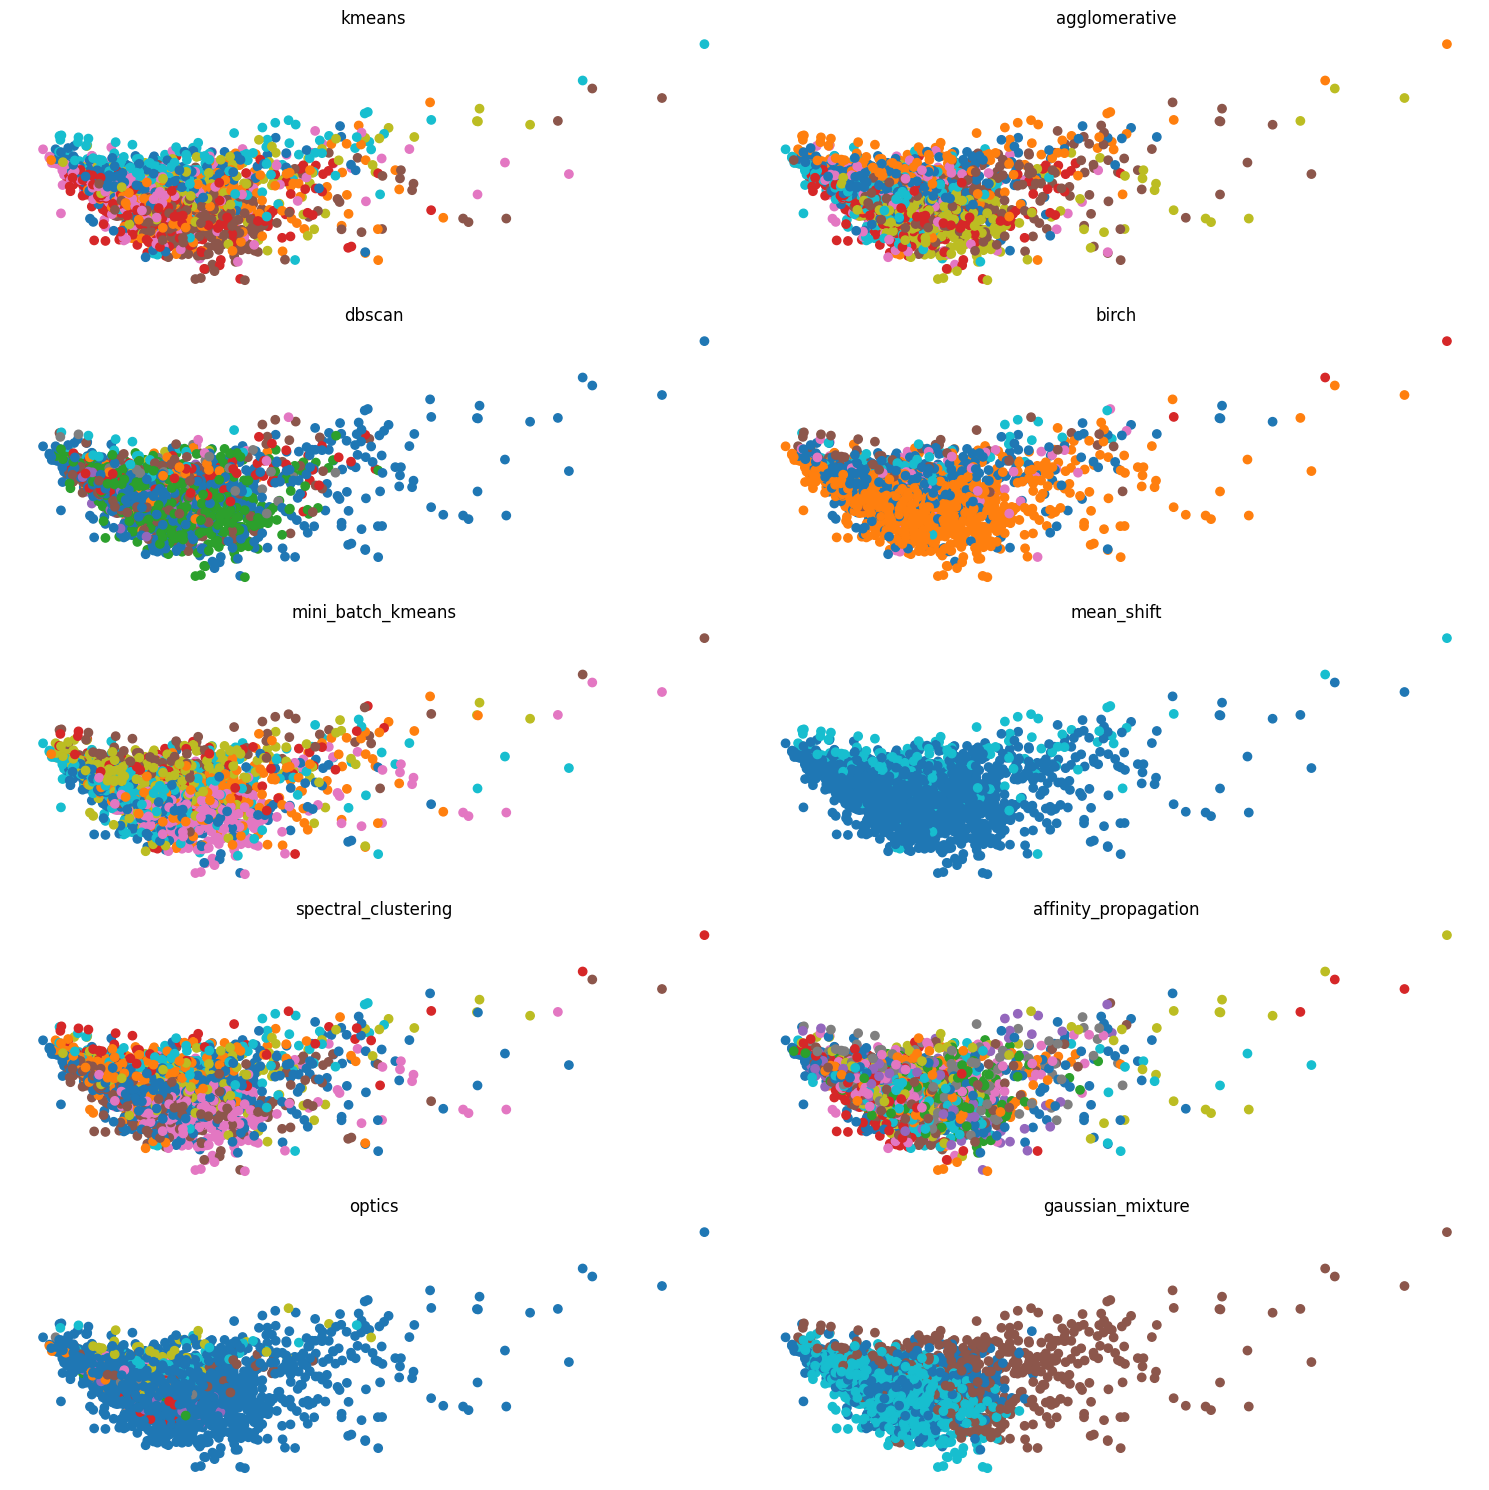

In [33]:
df2_results = pd.DataFrame()
perform_clustering1(df2, 7, df2_results,0.3)
perform_clustering2(df2, 7, df2_results)
scores_df2 = calculate_scores(df2, df2_results)
print(scores_df2)

# plot the results
plot_clusters(df2_results,df2_pca, df2_pca2, df2_tsne)

Sprawdzamy wyniki dla ramki danych df2.

### Sieci neuronowe

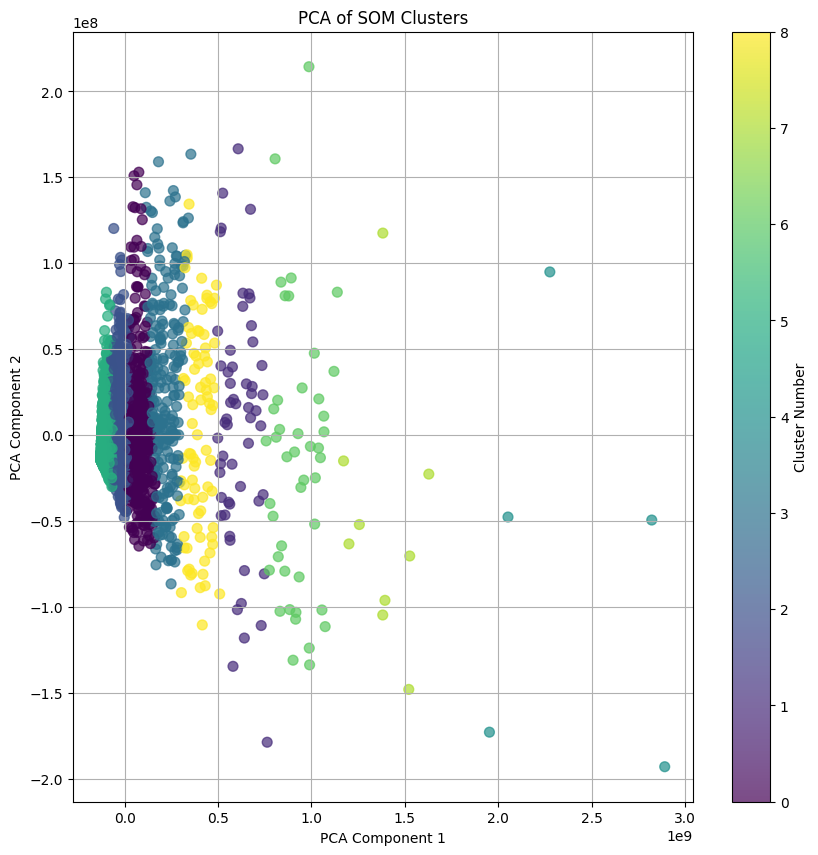

Silhouette Score: 0.4784270119715356
Calinski-Harabasz Score: 7554.584800030799
Davies-Bouldin Score: 0.8022172091365438


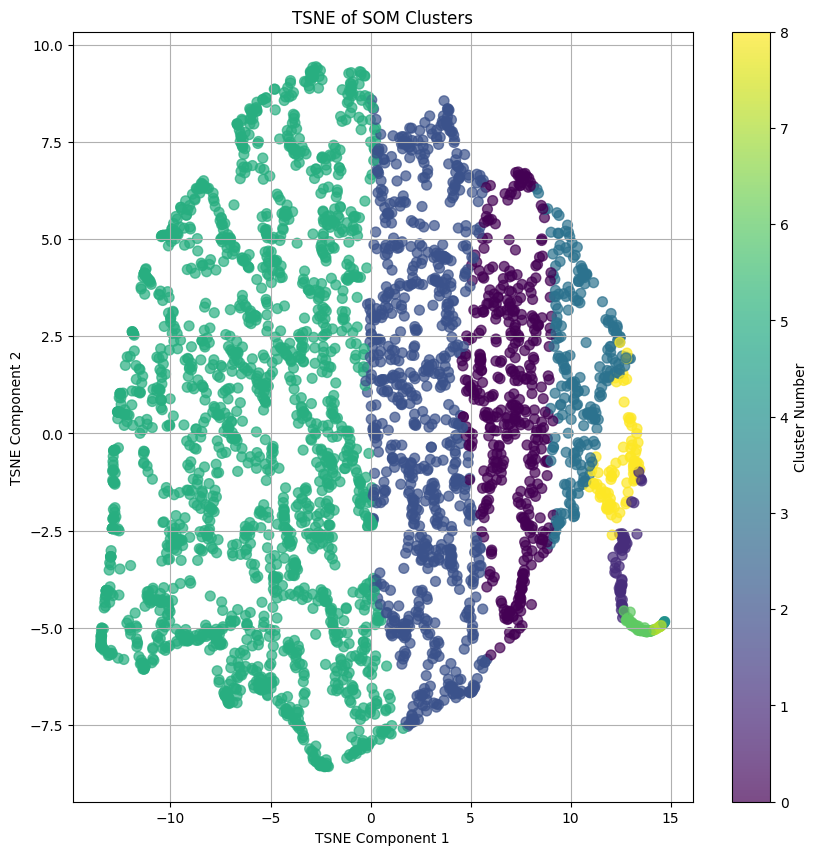

In [34]:
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#set random seed
np.random.seed(4324)



# Step 1: Create some example data
data_array = df1.to_numpy() # 100 samples, each with 3 features


# Step 2: Initialize the SOM
som_width = 3
som_height = 3
input_len = data_array.shape[1]
sigma = 0.1
learning_rate = 0.5

som = MiniSom(som_height, som_width, input_len, sigma=sigma, learning_rate=learning_rate)

# Initialize the weights
som.random_weights_init(data_array)

# Train the SOM
num_iterations = 10000
som.train_random(data_array, num_iterations)

# Step 3: Assign cluster numbers based on the BMUs
# Get the coordinates of the winning neurons (BMUs) for each input sample
winners = np.array([som.winner(x) for x in data_array])

# Assign a unique cluster number to each BMU
# Flatten the grid coordinates to a single cluster number
cluster_numbers = np.ravel_multi_index((winners[:, 0], winners[:, 1]), dims=(som_height, som_width))

# Step 4: Perform PCA for dimensionality reduction
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_array)

# Step 5: Visualize the clusters in a 2D scatter plot using the PCA results
plt.figure(figsize=(10, 10))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_numbers, cmap='viridis', s=50, alpha=0.7)
plt.title('PCA of SOM Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster Number')
plt.grid()
plt.show()


# Step 6: Calculate and print the clustering scores
sil_score = silhouette_score(data_array, cluster_numbers)
calinski_score = calinski_harabasz_score(data_array, cluster_numbers)
davies_score = davies_bouldin_score(data_array, cluster_numbers)

print(f'Silhouette Score: {sil_score}')
print(f'Calinski-Harabasz Score: {calinski_score}')
print(f'Davies-Bouldin Score: {davies_score}')

# Plot the results using TSNE
from sklearn.manifold import TSNE

# Perform TSNE on the PCA results
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
data_tsne = tsne.fit_transform(data_array)

# Visualize the clusters in a 2D scatter plot using the TSNE results
plt.figure(figsize=(10, 10))
scatter = plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=cluster_numbers, cmap='viridis', s=50, alpha=0.7)
plt.title('TSNE of SOM Clusters')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.colorbar(scatter, label='Cluster Number')
plt.grid()
plt.show()


Sieci neuronowe z wykorzystaniem biblioteki minisom. Jak widać model osiąga dobre wyniki.

In [35]:
from itertools import product
from minisom import MiniSom
from sklearn.metrics import silhouette_score

def optimize_som_hyperparameters(data, som_width_range, som_height_range, sigma_range, learning_rate_range, num_iterations):
    best_score = float('-inf')
    best_params = {}

    for width, height, sigma, learning_rate in product(som_width_range, som_height_range, sigma_range, learning_rate_range):
        som = MiniSom(width, height, data.shape[1], sigma=sigma, learning_rate=learning_rate)
        som.random_weights_init(data)
        som.train_random(data, num_iterations)

        winners = np.array([som.winner(x) for x in data])
        cluster_numbers = np.ravel_multi_index((winners[:, 0], winners[:, 1]), dims=(width, height))
        score = silhouette_score(data, cluster_numbers)

        if score > best_score:
            best_score = score
            best_params = {
                'width': width,
                'height': height,
                'sigma': sigma,
                'learning_rate': learning_rate
            }

    return best_params, best_score


In [36]:

# Define ranges for hyperparameters
som_width_range = [2, 3, 4]  # Example range for SOM width
som_height_range = [2, 3]  # Example range for SOM height
sigma_range = [0.1, 0.5, 1.0]  # Example range for sigma
learning_rate_range = [0.1, 0.5, 1.0]  # Example range for learning rate
num_iterations = 10000  # Number of training iterations

# Call the function to optimize hyperparameters
best_params, best_score = optimize_som_hyperparameters(data_array, som_width_range, som_height_range, sigma_range, learning_rate_range, num_iterations)

print("Best Hyperparameters:")
print(best_params)
print("Best Silhouette Score:", best_score)

Best Hyperparameters:
{'width': 2, 'height': 2, 'sigma': 0.5, 'learning_rate': 1.0}
Best Silhouette Score: 0.6916188647074845


Poprawienie wyniku poprzez użycie lepszych hiperparametrów.

In [37]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adam

# Rozmiar naszej reprezentacji kodowanej
encoding_dim = 32

# Definiowanie naszego autoenkodera
input_data = Input(shape=(12,))
encoded = Dense(64, activation='relu')(input_data)
encoded = Dropout(0.5)(encoded)  # Dodanie warstwy Dropout
encoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dropout(0.5)(decoded)  # Dodanie warstwy Dropout
decoded = Dense(12, activation='sigmoid')(decoded)
autoencoder = Model(input_data, decoded)

# Trenowanie autoenkodera
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')
autoencoder.fit(df4, df4, epochs=100, batch_size=256, shuffle=True)

# Użycie kodera do przekształcenia naszych danych do mniejszego wymiaru
encoder = Model(input_data, encoded)
x_train_encoded = encoder.predict(df4)

# Teraz możemy sklastrować nasze przekształcone dane za pomocą K-Means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(x_train_encoded)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.6967
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5125 
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2508 
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -0.2849 
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -1.4464 
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -4.3845 
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -11.8925 
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -28.6472 
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -64.9309 
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -124.2146
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -241.4064 
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -393.2852 
Epoch 13/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -702.3145 
Epoch 14/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -1117.0505 
Epoch 15/100
14/14 ━━━━━━━━━━━━━━━

KMeans(n_clusters=7, random_state=42)

In [38]:
# Przewiduj etykiety klastrów dla danych
labels = kmeans.predict(x_train_encoded)

# Wyświetl etykiety klastrów
print(labels)

# Wyświetl centra klastrów
print(kmeans.cluster_centers_)

[0 1 1 ... 1 1 1]
[[ 2.1621484e+03  2.2491145e+03  2.2216370e+03  2.2276904e+03
   2.2167349e+03  2.1746323e+03  2.2613413e+03  2.2510737e+03
   2.2223018e+03  2.2444453e+03  2.2538115e+03  2.2280234e+03
   2.2387490e+03  2.2389639e+03  2.2491313e+03  2.1789563e+03
   2.2098948e+03  2.2382441e+03  2.2063579e+03 -1.5258789e-05
   2.2592695e+03  2.2418765e+03  2.2401631e+03  2.1825103e+03
   2.2646602e+03  2.2609648e+03  2.2145630e+03  2.2583037e+03
   2.2260859e+03  2.2356802e+03  2.2179805e+03  2.2341704e+03]
 [ 4.5031372e+01  4.6155029e+01  4.5409302e+01  4.5491943e+01
   4.5799194e+01  4.5354858e+01  4.6328003e+01  4.6028931e+01
   4.5329834e+01  4.5772461e+01  4.6335938e+01  4.5684082e+01
   4.5845703e+01  4.5798706e+01  4.6050537e+01  4.5257568e+01
   4.5245239e+01  4.5745117e+01  4.5037598e+01  1.2806285e+02
   4.6140137e+01  4.5733521e+01  4.5820923e+01  4.4396118e+01
   4.6340332e+01  4.6288818e+01  4.5339844e+01  4.6276855e+01
   4.5651489e+01  4.5813110e+01  4.5169434e+01  4.5

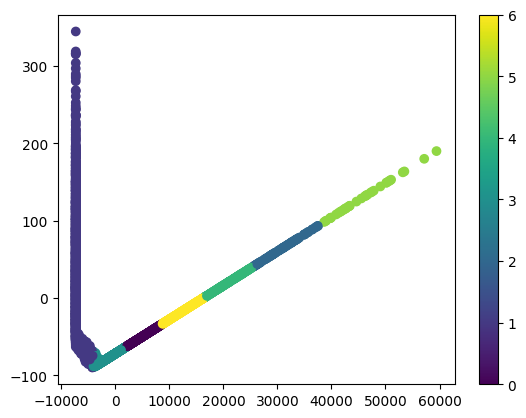

In [39]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Redukcja wymiarowości do 2D
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_encoded)

# Tworzenie wykresu
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=labels, cmap='viridis')
plt.colorbar()
plt.show()

In [40]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Obliczanie Silhouette Score
s_score = silhouette_score(x_train_encoded, labels)

# Obliczanie Davies-Bouldin Index i Calinski-Harabasz Score
calinski_harabasz_score = calinski_harabasz_score(x_train_encoded, labels)
db_score = davies_bouldin_score(x_train_encoded, labels)

print(f'Silhouette Score: {s_score}')
print(f'Calinski-Harabasz Score: {calinski_harabasz_score}')
print(f'Davies-Bouldin Index: {db_score}')

Silhouette Score: 0.7357840538024902
Calinski-Harabasz Score: 27561.809533731273
Davies-Bouldin Index: 0.4737904907381297


Sieć neuronowa (autoencoder) przy użyciu paczki tensorflow. Jak widać otrzymane wyniki są również bardzo dobre.

### Modele biznesowe

Poniżej przedstawimy funkcję, które spełniają założenia naszych modeli bizensowych.

### Model biznesowy 1 - propozycje filmów do obejrzenia

In [41]:
title = df['movie_title'].to_frame()

In [42]:
#title = pd.read_csv('../Data/titles.csv')
df3 = df3.join(title)

In [43]:
df3.columns

Index(['runtime_minutes', 'director_name', 'movie_averageRating',
       'movie_numerOfVotes', 'approval_Index', 'production_year', 'month_sin',
       'month_cos', 'number_of_professions', 'Production budget $',
       'Domestic gross $', 'Worldwide gross $', 'movie_title'],
      dtype='object')

In [1]:
features = ['runtime_minutes', 'director_name', 'movie_averageRating',
       'movie_numerOfVotes', 'approval_Index', 'production_year', 'month_sin',
       'month_cos', 'number_of_professions', 'Production budget $',
       'Domestic gross $', 'Worldwide gross $']

In [ ]:
import tkinter as tk
from tkinter import messagebox

def recommend_similar_movies(movie_title, n_recommendations=5):
    kmeans = KMeans(n_clusters=7, random_state=42)
    df3["cluster"] = kmeans.fit_predict(df3[features])
    movie_cluster = df3[df3["movie_title"] == movie_title]["cluster"].values[0]
    similar_movies = df3[(df3["cluster"] == movie_cluster) & (df3["movie_title"] != movie_title)]
    return similar_movies.sample(n=n_recommendations)['movie_title'].tolist()
def search_data(movie_list:list):
    info = []
    for movie in movie_list:
        matched = df[df['movie_title'] == movie]
        matched = matched[['movie_title', 'production_date', 'genres', 'runtime_minutes','director_name','movie_averageRating', 'movie_numerOfVotes',
       'approval_Index',]]
        if not matched.empty:
            inf = matched.iloc[0]
            formatted_info = "{} | Date: {} | Genres: {} | Runtime: {} | Director: {} | Rating: {} | Votes: {} | Approval: {}".format(
                inf['movie_title'], inf['production_date'], inf['genres'], inf['runtime_minutes'], inf['director_name'], 
                inf['movie_averageRating'], inf['movie_numerOfVotes'], inf['approval_Index'])
            info.append(formatted_info)
    return info
# Funkcja wyszukiwania filmów
def search_movies(event=None):
    search_text = entry.get().lower()
    matched_movies = df[df['movie_title'].str.lower().str.contains(search_text)]
    listbox.delete(0, tk.END)
    for title in matched_movies['movie_title']:
        listbox.insert(tk.END, title)
def on_select(event):
    selected_movie = listbox.get(listbox.curselection())
    searched = recommend_similar_movies(selected_movie)
    recommendations = '\n'.join(search_data(searched))  # Łączenie rekomendacji w jednym łańcuchu
    recommendations_var.set("Recommended movies:\n" + recommendations )
# Tworzenie głównego okna aplikacji
root = tk.Tk()

root.title("Movie Recommender")
#root.geometry("800x600")

# Tworzenie etykiety
label = tk.Label(root, text="Enter movie name:")
label.pack(pady=10)

# Tworzenie pola tekstowego
entry = tk.Entry(root, width=40)
entry.pack(pady=10)
entry.bind('<KeyRelease>', search_movies)

# Tworzenie listboxa do wyświetlania wyników wyszukiwania
listbox = tk.Listbox(root, width=50, height=10)
listbox.pack(pady=10)
listbox.bind('<<ListboxSelect>>', on_select)

# Tworzenie etykiety do wyświetlania rekomendacji
recommendations_var = tk.StringVar()
recommendations_label = tk.Label(root, textvariable=recommendations_var, justify=tk.LEFT, anchor="w", width=150)
recommendations_label.pack(pady=10)

# Uruchomienie głównej pętli Tkinter
root.mainloop()

Funkcja wraz z gui, która poleca nam jaki film obejrzeć, po obejrzeniu filmu podanego w polu do wpisania.

### Model biznesowy 2 - propozycje jakie filmy najlepiej się sprzedają dla producentów filmowych

In [ ]:
def recommend_movies_to_make():
    # Klasteryzacja filmów
    kmeans = KMeans(n_clusters=7, random_state=42)
    df3["cluster"] = kmeans.fit_predict(df3[features])
    
    # Obliczanie średniego zysku i oceny dla każdego klastra
    cluster_means = df3.groupby('cluster').agg({'Worldwide gross $': 'max', 'movie_averageRating': 'max', 'movie_numerOfVotes' : 'max', 'approval_Index' : 'max'})
    
    # Znajdowanie klastra z największym średnim zyskiem i oceną
    best_cluster = cluster_means.sort_values(by=['Worldwide gross $', 'movie_averageRating'], ascending=False).index[0]
    
    # Znajdowanie filmów w najlepszym klastrze
    best_movies = df3[(df3["cluster"] == best_cluster)]
    
    # Dodawanie informacji o gatunku, czasie trwania i dacie do wyników
    recommended_movies_info = df[['movie_title', 'genres', 'runtime_minutes', 'production_date']].merge(best_movies['movie_title'], on='movie_title')
    
    # Dodawanie średnich wartości zysku, oceny, liczby głosów i indeksu akceptacji dla klastra
    cluster_info = cluster_means.loc[best_cluster]
    
    return recommended_movies_info, cluster_info

In [ ]:
def analyze_movies(movies):
    # Najczęściej występujący gatunek
    genres = movies['genres'].str.split(',', expand=True).stack()
    most_common_genre = genres.value_counts().idxmax()

    # Średnia długość trwania filmu
    average_runtime = movies['runtime_minutes'].mean()

    # Najczęściej występujący miesiąc
    movies['production_date'] = pd.to_datetime(movies['production_date'])
    most_common_month = movies['production_date'].dt.month.value_counts().idxmax()

    return most_common_genre, average_runtime, most_common_month

movies, cluster_info = recommend_movies_to_make()
most_common_genre, average_runtime, most_common_month = analyze_movies(movies)

print(f"Most common genre: {most_common_genre}")
print(f"Average runtime: {average_runtime}")
print(f"Most common month: {most_common_month}")

Most common genre: Drama
Average runtime: 110.81719260065289
Most common month: 10


Najlepiej tworzyć się filmy z gatunku Drama, o średnim czasie trwania 110 minut oraz najelpszy miesiąc na wydanie takiego filmu to październik.